## Problem Set 5
### Chapter 7 Exercise

In [101]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [4]:
plt.style.use("seaborn-dark")

### Exercise 1.

In [99]:
def ex1(phi):
    eps = np.random.randn(200)
    series = [0]
    for e in eps:
        y1 = 1 + phi * series[-1] + e
        series.append(y1)
    print(f"Mean: {np.mean(series)}")
    plt.plot(series)
    plt.title(f"AR(1) phi={phi}")
    plt.grid(True)
    plt.show()
    
    sm.tsa.graphics.plot_acf(
        series,
        lags=10,
        zero=True,
        alpha=0.05
    )
    plt.show()
    
    sm.tsa.graphics.plot_pacf(
        series,
        lags=10,
        zero=True,
        alpha=0.05,
        method="ywmle"
    )
    plt.show()
    return series

Mean: 3.06601458683368


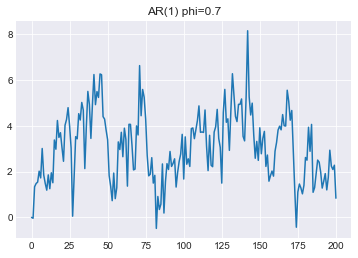

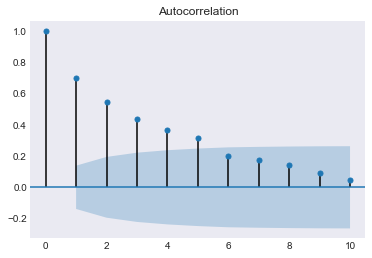

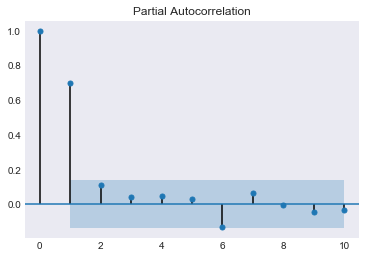

Mean: 0.4684972517571212


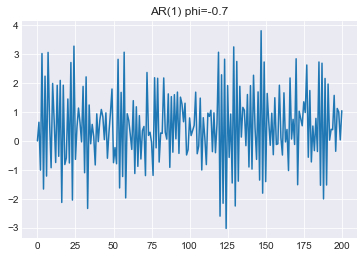

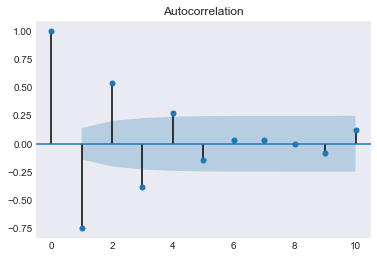

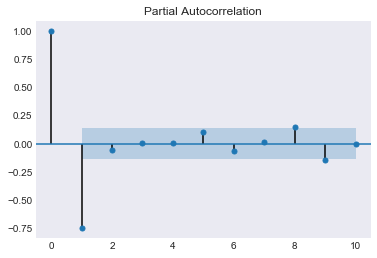

In [100]:
s1 = ex1(phi=0.7)
s2 = ex1(phi=-0.7)

### Exercise 6.

In [141]:
cpi = pd.read_csv("data/CPIAUCSL.csv", index_col=0, parse_dates=True)
inf = cpi.pct_change()
inf.dropna(inplace=True)
print(inf.head())

            CPIAUCSL
DATE                
1947-02-01  0.006518
1947-03-01  0.017576
1947-04-01  0.000000
1947-05-01 -0.002273
1947-06-01  0.005923


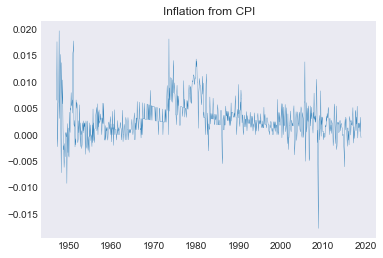

In [129]:
plt.plot(inf, linewidth=0.3)
plt.title("Inflation from CPI")
plt.show()

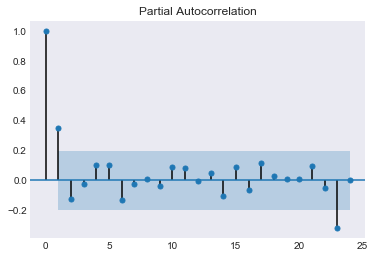

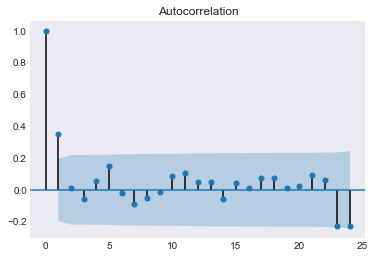

In [174]:
plt.close()
sm.tsa.graphics.plot_pacf(inf[-100:], lags=24, zero=True, method="ywm")
plt.show()
plt.close()
sm.tsa.graphics.plot_acf(inf[-100:], lags=24, zero=True)
plt.show()

In [186]:
X = np.squeeze(inf.values[-100:])
model = sm.tsa.ARMA(X, order=(2, 0))
mdl = model.fit(trend="c", method="mle")
print(mdl.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 0)   Log Likelihood                 485.686
Method:                           mle   S.D. of innovations              0.002
Date:                Wed, 13 Feb 2019   AIC                           -963.372
Time:                        20:21:37   BIC                           -952.951
Sample:                             0   HQIC                          -959.155
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.000      5.756      0.000       0.001       0.002
ar.L1.y        0.3948      0.099      3.983      0.000       0.201       0.589
ar.L2.y       -0.1261      0.099     -1.271      0.2

### Exercise 10.

In [194]:
def ar3sim(phi, sample_size=100):
    # AR(3) simulation
    eps = np.random.randn(sample_size)
    series = [0, 0, 0]
    for e in eps:
        y = phi[0] * series[-1] + phi[1] * series[-2] + phi[2] * series[-3] + e
        series.append(y)
    print(f"Mean: {np.mean(series)}")
    
    plt.plot(series)
    plt.title(f"AR(1) phi={phi}")
    plt.grid(True)
    plt.show()
    
    sm.tsa.graphics.plot_acf(
        series,
        lags=10,
        zero=True,
        alpha=0.05
    )
    plt.show()
    
    sm.tsa.graphics.plot_pacf(
        series,
        lags=10,
        zero=True,
        alpha=0.05,
        method="ywmle"
    )
    plt.show()
    return series

Mean: -0.16510358324909777


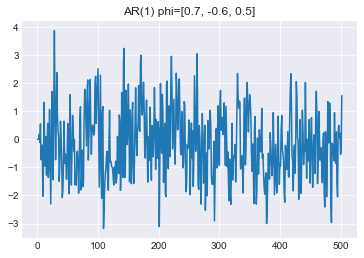

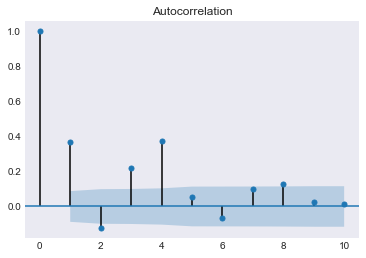

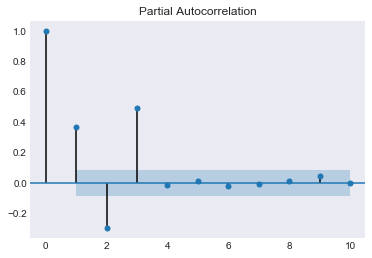

Mean: 0.002320318604318801


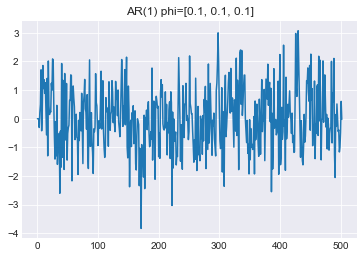

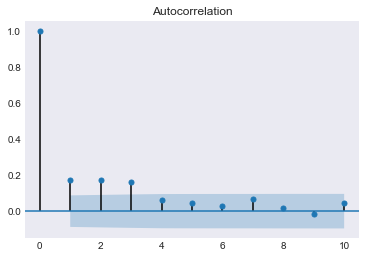

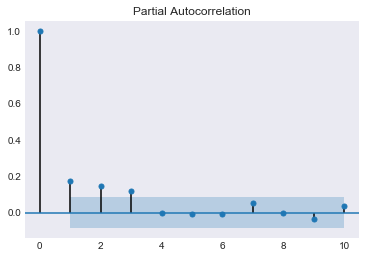

In [206]:
sim1 = ar3sim(phi=[0.7, -0.6, 0.5], sample_size=500)
sim2 = ar3sim(phi=[0.1, 0.1, 0.1], sample_size=500)